In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
from sqlalchemy import inspect

In [11]:
inspector = inspect(engine)

In [24]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [25]:
columns2 = inspector.get_columns('Station')
for column in columns2:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
strDate = session.query(func.max(measurement.date)).first()[0]

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
prevYear = dt.datetime.strptime(strDate, '%Y-%m-%d') - dt.timedelta(365)

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date > prevYear).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data=results, columns = ['date','prcp',])

# Sort the dataframe by date
df = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data




<AxesSubplot:xlabel='date', ylabel='Inches'>

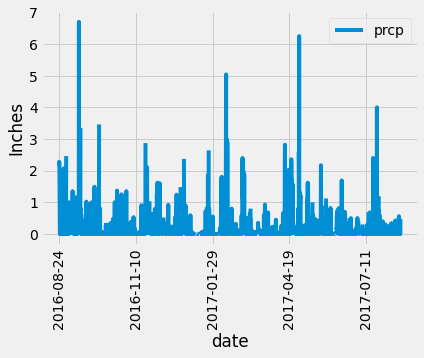

In [20]:
df.plot(x='date', y='prcp', rot=90, ylabel='Inches')

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
actSta = session.query(func.count(Measurement.tobs),Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc())
for s in actSta:
    print(s)

(2772, 'USC00519281')
(2724, 'USC00519397')
(2709, 'USC00513117')
(2669, 'USC00519523')
(2612, 'USC00516128')
(2202, 'USC00514830')
(1979, 'USC00511918')
(1372, 'USC00517948')
(511, 'USC00518838')


In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low = session.query(func.min(Measurement.tobs).filter(Measurement.station=='USC00519281'))
for l in low:
    print(l)

(54.0,)


In [38]:
high = session.query(func.max(Measurement.tobs).filter(Measurement.station=='USC00519281'))
for h in high:
    print(h)

(85.0,)


In [39]:
average = session.query(func.avg(Measurement.tobs).filter(Measurement.station=='USC00519281'))
for a in average:
    print(a)

(71.66378066378067,)


In [42]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).filter(Measurement.station =='USC00519281').filter(Measurement.date > prevYear).all()

In [47]:
df2 = pd.DataFrame(data=temps, columns = ['tobs'])

<AxesSubplot:ylabel='Frequency'>

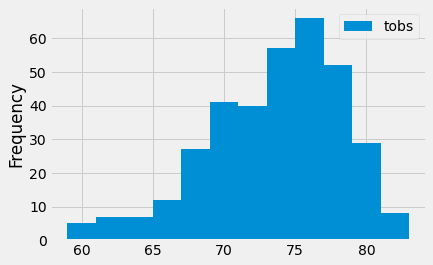

In [52]:
df2.plot.hist(bins=12)

# Close session

In [53]:
# Close Session
session.close()